# Modelling a Random Forest classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [3]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [4]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(13439, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3360, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(13439,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3360,)

In [13]:
THRESHOLD = 40

In [14]:
y_train_Bool = y_train >= THRESHOLD

In [15]:
y_test_Bool = y_test >= THRESHOLD

### Modelling

In [16]:
model = RandomForestClassifier(random_state=42)

In [17]:
model.fit(X_train, y_train_Bool)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
model.score(X_test, y_test_Bool)

0.9514880952380952

In [19]:
model.classes_

array([False,  True])

In [20]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
y_pred = model.predict(X_test)

In [22]:
sum(y_pred) / float(len(y_pred))

0.8693452380952381

In [23]:
print(classification_report(y_test_Bool, y_pred))

             precision    recall  f1-score   support

      False       0.84      0.80      0.82       464
       True       0.97      0.98      0.97      2896

avg / total       0.95      0.95      0.95      3360



In [24]:
importances = model.feature_importances_

In [25]:
# importances

In [26]:
indices = np.argsort(importances)[::-1]

In [27]:
# indices

In [28]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature FIRST_RESULT_P [821] (0.108992)
2. Feature Y2_RETURN_N [728] (0.096176)
3. Feature PASS_M5_Y [735] (0.070435)
4. Feature PASS_M1_0 [730] (0.052523)
5. Feature NUM_M5_FAILS [838] (0.048287)
6. Feature Y2_RETURN_Y [729] (0.044276)
7. Feature PASS_M8_N [737] (0.025764)
8. Feature EARLY_CANX_LEFT_Y [8] (0.021629)
9. Feature NUM_EARLY_ACCESS_DAYS [861] (0.016512)
10. Feature NUM_M8_SUBJECTS [836] (0.016382)
11. Feature FIRST_RESULT_F [819] (0.016118)
12. Feature YR_NUM [822] (0.014015)
13. Feature PREV_RESULT_F [429] (0.013259)
14. Feature PASS_M5_0 [733] (0.010847)
15. Feature NUM_M1_FAILS [837] (0.010819)
16. Feature AGE_AT_START [839] (0.010198)
17. Feature PASS_M1_Y [732] (0.009971)
18. Feature TOTAL_YEARS [823] (0.009855)
19. Feature NUM_M5_SUBJECTS [835] (0.008729)
20. Feature PASS_M8_0 [736] (0.008706)
21. Feature DAYS_TO_FIRST_LAB [842] (0.008654)
22. Feature FIRST_RESULT_F0 [820] (0.008562)
23. Feature NUM_FEB_ACCESS_DAYS [870] (0.008452)
24. Feature NUM

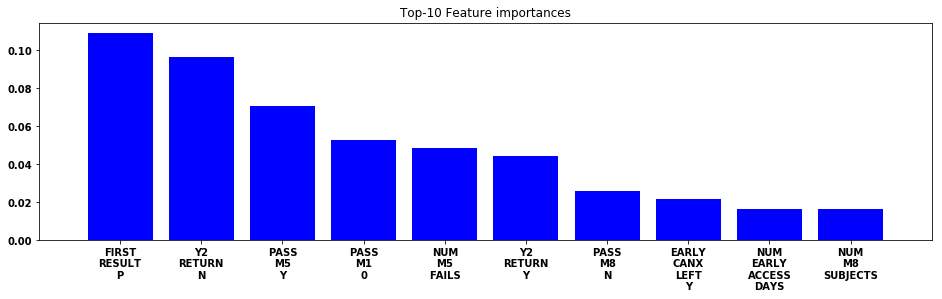

In [29]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
plt.xlim([-1, N])
plt.savefig('../figures/modelling_Random_Forest_Top_10_Feature_Importances.png', bbox_inches="tight")
plt.show()

## Dropping important columns

In [30]:
patterns_to_drop = [
    'FIRST_RESULT_',
    'Y2_RETURN_',
    'NUM_M1_FAILS',
    'NUM_M5_FAILS',
    'PASS_M1_',
    'PASS_M5_',
    'PASS_M8_',
    'NEXT_RESULT_',
]

In [31]:
cols_to_drop = [col for col in feature_names for pattern in patterns_to_drop if pattern in col]

In [32]:
cols_to_drop

['NEXT_RESULT_F',
 'NEXT_RESULT_F0',
 'NEXT_RESULT_P',
 'Y2_RETURN_N',
 'Y2_RETURN_Y',
 'PASS_M1_0',
 'PASS_M1_N',
 'PASS_M1_Y',
 'PASS_M5_0',
 'PASS_M5_N',
 'PASS_M5_Y',
 'PASS_M8_0',
 'PASS_M8_N',
 'PASS_M8_Y',
 'FIRST_RESULT_F',
 'FIRST_RESULT_F0',
 'FIRST_RESULT_P',
 'NUM_M1_FAILS',
 'NUM_M5_FAILS']

In [33]:
indexes_to_drop = [ feature_names.index(col) for col in cols_to_drop ]

In [34]:
indexes_to_drop

[725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 819,
 820,
 821,
 837,
 838]

In [35]:
X_train = np.delete(X_train, indexes_to_drop, axis=1)

In [36]:
X_train.shape

(13439, 869)

In [37]:
X_test = np.delete(X_test, indexes_to_drop, axis=1)

In [38]:
X_test.shape

(3360, 869)

In [39]:
# Note that you need to delete them in reverse order so that you don't throw off the subsequent indexes.
for index in sorted(indexes_to_drop, reverse=True):
    del feature_names[index]

In [40]:
len(feature_names)

869

In [41]:
model = RandomForestClassifier(random_state=42)

In [42]:
model.fit(X_train, y_train_Bool)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
model.score(X_test, y_test_Bool)

0.9479166666666666

In [44]:
model.classes_

array([False,  True])

In [45]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred = model.predict(X_test)

In [47]:
sum(y_pred) / float(len(y_pred))

0.8818452380952381

In [48]:
print(classification_report(y_test_Bool, y_pred))

             precision    recall  f1-score   support

      False       0.86      0.74      0.80       464
       True       0.96      0.98      0.97      2896

avg / total       0.95      0.95      0.95      3360



In [49]:
importances = model.feature_importances_

In [50]:
# importances

In [51]:
indices = np.argsort(importances)[::-1]

In [52]:
# indices

In [53]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature NUM_M8_SUBJECTS [819] (0.181080)
2. Feature FEB_CANX_LEFT_N [11] (0.068333)
3. Feature TOTAL_YEARS [806] (0.044044)
4. Feature EARLY_CANX_LEFT_Y [8] (0.037775)
5. Feature FEB_CANX_LEFT_Y [12] (0.035228)
6. Feature NUM_FEB_ACCESS_DAYS [851] (0.017219)
7. Feature AGE_AT_START [820] (0.015753)
8. Feature CANX_2017.0 [227] (0.014662)
9. Feature NUM_EARLY_ACCESS_DAYS [842] (0.013266)
10. Feature CANX_2015.0 [225] (0.013251)
11. Feature DAYS_TO_FIRST_REG [807] (0.012381)
12. Feature FEB_CANX_DEFER_Y [14] (0.012104)
13. Feature CAO_POINTS [810] (0.011309)
14. Feature CANX_2018.0 [228] (0.011025)
15. Feature NUM_SUBJECTS [813] (0.010998)
16. Feature PREV_RESULT_F [429] (0.010282)
17. Feature DAYS_TO_FIRST_LAB [823] (0.009209)
18. Feature SCH_ENROLMENTS [808] (0.009056)
19. Feature DAYS_TO_FIRST_ACCESS [824] (0.008823)
20. Feature DAYS_TO_FIRST_LOAN [822] (0.008332)
21. Feature EARLY_CANX_LEFT_N [7] (0.008291)
22. Feature FIRST_CANX_2014.0 [641] (0.007657)
23. Featur

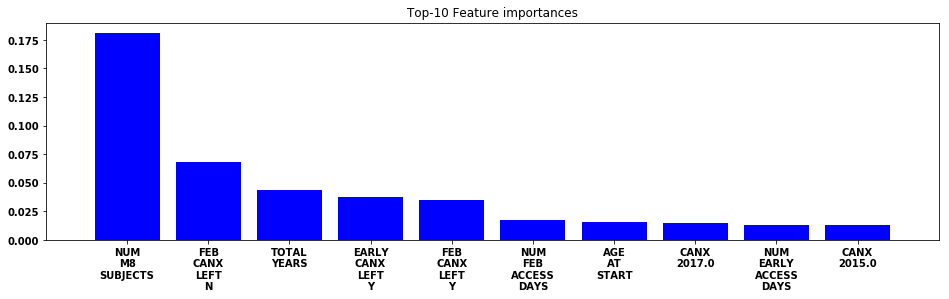

In [54]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
plt.xlim([-1, N])
plt.savefig('../figures/modelling_Random_Forest_less_important_features_Top_10_Feature_Importances.png', 
            bbox_inches="tight")
plt.show()